# Detecting malicious URLs
Some introduction...

## Data exploration and cleaning

### General dataset information

In [140]:
DATASET_PATH = 'datasets/malicious_urls.csv'

In [141]:
import pandas as pd

df = pd.read_csv(DATASET_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [142]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [143]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [144]:
# Remove duplicates
df.drop_duplicates(inplace=True, subset=['url'], keep='last')
count = df.type.value_counts()
count

benign        428074
defacement     95308
phishing       94092
malware        23645
Name: type, dtype: int64

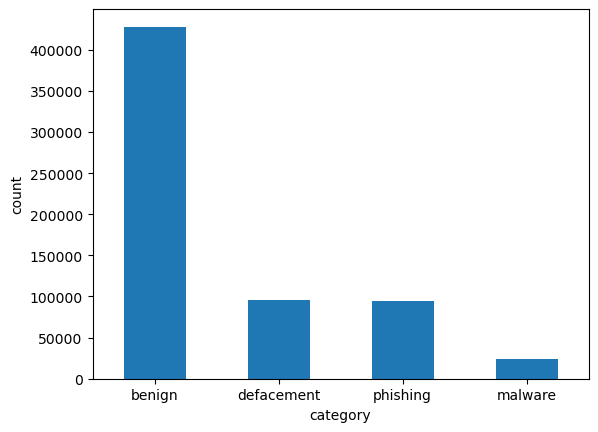

In [145]:
import matplotlib.pyplot as plt
count.plot.bar()
plt.xticks(rotation=0)
plt.xlabel("category")
plt.ylabel("count")
plt.show()

### Character encoding

In [146]:
# Detect character encoding
import chardet

encodings = df['url'].apply(lambda x: chardet.detect(str(x).encode('utf-8')))
df['encoding'] = encodings.apply(lambda x: x['encoding'])
df['enc_confidence'] = encodings.apply(lambda x: x['confidence'])
df.head(10)

,url,type,encoding,enc_confidence
0,br-icloud.com.br,phishing,ascii,1.0
1,mp3raid.com/music/krizz_kaliko.html,benign,ascii,1.0
2,bopsecrets.org/rexroth/cr/1.htm,benign,ascii,1.0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,ascii,1.0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,ascii,1.0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,ascii,1.0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,ascii,1.0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,ascii,1.0
8,http://www.pashminaonline.com/pure-pashminas,defacement,ascii,1.0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,ascii,1.0


In [147]:
# By trying some queries we observe that there are some URL strings with broken encoding
df.query(expr='encoding not in ("ascii" , "utf-8")')

,url,type,encoding,enc_confidence
4491,citizendia.org/Agence_métropolitaine_de_transport,benign,ISO-8859-9,0.629187
7564,wn.com/HYMNE_NATIONAL_DU_QUÉBEC,benign,Windows-1252,0.730000
8116,forum.verygames.net/showthread.php?42812-Probl...,benign,MacRoman,0.635195
14053,dictionary.sensagent.com/jehane+benoît/fr-fr/,benign,ISO-8859-9,0.682751
14853,dictionary.sensagent.com/université+de+sherbro...,benign,MacRoman,0.621045
...,...,...,...,...
573492,ÆÖY'uEdS*Z£ñ>7ñV\pìnY÷¡ß¬á'×?...,phishing,TIS-620,0.210592
573495,ùAyéTôDpFc~h@^¶\øâèû¥ÊÞG·ê(Tøì\0«Y=D ...,phishing,None,0.000000
573499,=Rãmôj³{è!ÀM¶6<N>w ¼Cf£]4ÍnÝÌ,phishing,None,0.000000
573507,«Düéºþ +ZIdN Ö-lh9L©hDKÄúhßÆ%YqÃ±¹d,phishing,None,0.000000


In [148]:
# Attempt to fix some broken encoding ("mojibake")
from ftfy import fix_encoding

df_fixed = pd.DataFrame()
df_fixed['url'] = df['url']
df_fixed['url_fixed'] = df_fixed['url'].apply(fix_encoding)
df_fixed.query(expr='url != url_fixed')

,url,url_fixed
44274,zoominfo.com/people/de%20GrandprÃ©_Jean_344774...,zoominfo.com/people/de%20Grandpré_Jean_3447745...
61961,http://www.scsrxx.com/js/?https://secure.runes...,http://www.scsrxx.com/js/?https://secure.runes...
126643,zoominfo.com/people/Sagan_FranÃƒÆ’Ã‚Â§oise_147...,zoominfo.com/people/Sagan_Françoise_1473040483...
300255,castroller.com/podcasts/CanaluPodcasts3/128646...,castroller.com/podcasts/CanaluPodcasts3/128646...
360359,zoominfo.com/people/SÃ©vigny_Danielle_15449882...,zoominfo.com/people/Sévigny_Danielle_154498825...
...,...,...
573506,r $ÐcYõ,r $Ðc˜‚Yõ
573507,«Düéºþ +ZIdN Ö-lh9L©hDKÄúhßÆ%YqÃ±¹d,«Dü‘éºþ +ZIdN Ö-lh9L©hŽDKÄúhßÆ%Yqñ¹d
573508,Þ~³\(ÿÇ½Jú$Xm £ÜëÃ5{¾kÜãCê_QÊ©B ÇÈc2...,އ~³„Ÿ\(ÿǽJú$Xm £ÜëÃ5{¾kÜãCê_QÊ©B…ǆÈc2#S...
573509,"ëËl×uÏB'JI¨GÙn""Ç( 0","ëËl×uÏB'JI¨GÙn""Ç(…0"


In [149]:
# Commit changes and check for strings that are still broken
df['url'] = df_fixed['url_fixed']
df.query('enc_confidence < 0.5')    # Includes all unidentified encodings

,url,type,encoding,enc_confidence
573417,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,phishing,None,0.000000
573418,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,phishing,None,0.000000
573422,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,phishing,TIS-620,0.264226
573424,esxcc.com/js/index.htm?us.battle.net/login/en/...,phishing,Windows-1254,0.490066
573425,esxcc.com/js/index.htm?us.battle.net/login/en/...,phishing,Windows-1252,0.228806
573427,>Iq9E) l¬0™ZÝìÃw!'Ôp£ãW§&£Ñ p&$ImÞôöÝYÖ,phishing,TIS-620,0.257015
573429,esxcc.com/js/index.htm?us.battle.net/login/en/...,phishing,TIS-620,0.203882
573430,"˜ ꭛~l‡+×û¢ïÄÁŒR""+íI",phishing,None,0.000000
573431,ŠRybjUxÙãl5»7ÆE%ÝÔk+h |U+ýk©ìɔ½“Æq]âF·žõÁ...,phishing,None,0.000000
573432,§¬I0f9ÎPðÏ}åç`.7õú X '˜}—؁4~æʸa(_à,phishing,TIS-620,0.335509


In [150]:
# It seems there is an interval of rows where these invalid urls are concentrated
df.loc[573418:573510]

,url,type,encoding,enc_confidence
573418,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,phishing,None,0.000000
573419,'www.institutocgr.coo/web/media/syqvem/dk-óij...,phishing,Windows-1252,0.730000
573420,Yìê‡ koãջΧDéÎl½ñ¡ââqtò¸/à; Í,phishing,utf-8,0.990000
573421,虠kvüDâQÎé4¼ÒŽ©,benign,utf-8,0.990000
573422,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,phishing,TIS-620,0.264226
...,...,...,...,...
573506,r $Ðc˜‚Yõ,phishing,utf-8,0.990000
573507,«Dü‘éºþ +ZIdN Ö-lh9L©hŽDKÄúhßÆ%Yqñ¹d,phishing,None,0.000000
573508,އ~³„Ÿ\(ÿǽJú$Xm £ÜëÃ5{¾kÜãCê_QÊ©B…ǆÈc2#S...,phishing,None,0.000000
573509,"ëËl×uÏB'JI¨GÙn""Ç(…0",phishing,utf-8,0.990000


In [151]:
# Remove urls we can't fix
df.drop(df.loc[573418:573510].index, inplace=True)

In [152]:
# Remove enc_confidence as it will not be needed for training
df.drop('enc_confidence', axis=1, inplace=True)

### Prepare URLs for parsing

In [153]:
import re

# Add // before every URL so that urllib.parse can detect the netloc part correctly (https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlparse)
df['url'] = df['url'].apply(lambda x: '//' + str(x) if not re.match(pattern="^.{0,5}:\/\/", string=str(x)) else str(x))
df.head(10)

,url,type,encoding
0,//br-icloud.com.br,phishing,ascii
1,//mp3raid.com/music/krizz_kaliko.html,benign,ascii
2,//bopsecrets.org/rexroth/cr/1.htm,benign,ascii
3,http://www.garage-pirenne.be/index.php?option=...,defacement,ascii
4,http://adventure-nicaragua.net/index.php?optio...,defacement,ascii
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,ascii
6,//espn.go.com/nba/player/_/id/3457/brandon-rush,benign,ascii
7,//yourbittorrent.com/?q=anthony-hamilton-soulife,benign,ascii
8,http://www.pashminaonline.com/pure-pashminas,defacement,ascii
9,//allmusic.com/album/crazy-from-the-heat-r16990,benign,ascii


In [154]:
from urllib.parse import urlparse

# Check if we have any exceptions while parsing
success = True
for url in df['url']:
    try:
        urlparse(url)
    except ValueError as e:
        success = False
        print(e)
if success :
    print('no errors.')

no errors.


In [155]:
# Check again for duplicates since we changed some urls
df.drop_duplicates(inplace=True, subset=['url'], keep='last')

## Feature extraction

In [156]:
df['length'] = df['url'].apply(lambda x: len(str(x)))

urls = df['url'].apply(urlparse)

df['hostname'] = urls.apply(lambda x: x.hostname)
df['port'] = urls.apply(lambda x: x.port).astype('string')
df['protocol'] = urls.apply(lambda x: x.scheme)
df['path'] = urls.apply(lambda x: x.path)
df['query'] = urls.apply(lambda x: x.query)
df['fragment'] = urls.apply(lambda x: x.fragment)

df.sample(10)

,url,type,encoding,length,hostname,port,protocol,path,query,fragment
321859,http://www.horizonte-hospizverein.de/index.php...,defacement,ascii,122,www.horizonte-hospizverein.de,<NA>,http,/index.php,option=com_jevents&task=day.listevents&year=20...,
503892,//phonebookofgermany.com/,benign,ascii,25,phonebookofgermany.com,<NA>,,/,,
483595,//macleans.ca/tag/gilles-duceppe/,benign,ascii,33,macleans.ca,<NA>,,/tag/gilles-duceppe/,,
151959,//cflgreycup.ca/article/grant-visualizing-the-...,benign,ascii,65,cflgreycup.ca,<NA>,,/article/grant-visualizing-the-grey-cup-game_4...,,
290357,//en.wikipedia.org/wiki/Bev_Desjarlais,benign,ascii,38,en.wikipedia.org,<NA>,,/wiki/Bev_Desjarlais,,
2460,http://www.marketingendesign.nl/sprekers/159-a...,defacement,ascii,57,www.marketingendesign.nl,<NA>,http,/sprekers/159-alef-de-jong,,
460947,http://comicbook.com/2015/04/14/video-deadpool...,benign,ascii,93,comicbook.com,<NA>,http,/2015/04/14/video-deadpool-gets-in-the-face-of...,,
362939,//yellowpages.ca/bus/Quebec/Brossard/Centre-d-...,benign,ascii,82,yellowpages.ca,<NA>,,/bus/Quebec/Brossard/Centre-d-Accueil-Marcelle...,,
258529,//amazon.com/99-Novels-Best-English-Since/dp/0...,benign,ascii,55,amazon.com,<NA>,,/99-Novels-Best-English-Since/dp/0671554859,,
79457,//muswell-hill.com/n10biz/info/news/berniegran...,benign,ascii,63,muswell-hill.com,<NA>,,/n10biz/info/news/berniegrant/berniegrant.htm,,


In [157]:
from urllib.parse import parse_qs

df['query_length'] = df['query'].apply(lambda x: len(str(x)))

df['query_args'] = df['query'].apply(lambda x: len(parse_qs(x)))

df.query('type != "benign"').describe(include='all')

,url,type,encoding,length,hostname,port,protocol,path,query,fragment,query_length,query_args
count,212942,212942,212941,212942.000000,212942,4993,212942,212942,212942,212942,212942.000000,212942.000000
unique,212942,3,5,NaN,65216,3856,4,105883,49826,305,NaN,NaN
top,//br-icloud.com.br,defacement,ascii,NaN,tools.ietf.org,1691.0,http,/index.php,,,NaN,NaN
freq,1,95308,212407,NaN,3190,44,128877,38502,149489,212594,NaN,NaN
mean,NaN,NaN,NaN,64.597045,NaN,NaN,NaN,NaN,NaN,NaN,19.116553,1.070944
std,NaN,NaN,NaN,45.285799,NaN,NaN,NaN,NaN,NaN,NaN,39.237758,1.951888
min,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,1.000000


In [158]:
from pathlib import Path

df['path_length'] = df['path'].apply(lambda x: len(str(x)))

df['path_depth'] = df['path'].apply(lambda x: len(Path(str(x)).parents))

df.query('type != "benign"').describe(include='all')

,url,type,encoding,length,hostname,port,protocol,path,query,fragment,query_length,query_args,path_length,path_depth
count,212942,212942,212941,212942.000000,212942,4993,212942,212942,212942,212942,212942.000000,212942.000000,212942.000000,212942.000000
unique,212942,3,5,NaN,65216,3856,4,105883,49826,305,NaN,NaN,NaN,NaN
top,//br-icloud.com.br,defacement,ascii,NaN,tools.ietf.org,1691.0,http,/index.php,,,NaN,NaN,NaN,NaN
freq,1,95308,212407,NaN,3190,44,128877,38502,149489,212594,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,64.597045,NaN,NaN,NaN,NaN,NaN,NaN,19.116553,1.070944,20.894680,1.788341
std,NaN,NaN,NaN,45.285799,NaN,NaN,NaN,NaN,NaN,NaN,39.237758,1.951888,22.164117,1.469941
min,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,10.000000,1.000000
50%,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,13.000000,1.000000
75%,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,1.000000,27.000000,2.000000


In [159]:
import ipaddress

def is_ip(url):
    try:
        ip = ipaddress.ip_address(url)
    except:
        return False
    return str(ip) == url

df['hostname_lenght'] = df['hostname'].apply(lambda x: len(str(x)))

df['has_ip'] = df['hostname'].apply(lambda x: is_ip(str(x)))

df.query(expr='has_ip == True').describe(include='all')

,url,type,encoding,length,hostname,port,protocol,path,query,fragment,query_length,query_args,path_length,path_depth,hostname_lenght,has_ip
count,12126,12126,12126,12126.000000,12126,4913,12126,12126,12126,12126,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126
unique,12126,3,1,NaN,4953,3839,4,2330,70,2,NaN,NaN,NaN,NaN,NaN,1
top,//77.228.191.183:7674/zeujuus/a/modules/config...,malware,ascii,NaN,45.95.168.207,1691.0,http,/Mozi.m,,,NaN,NaN,NaN,NaN,NaN,True
freq,1,11769,12126,NaN,63,44,12067,4100,12051,12125,NaN,NaN,NaN,NaN,NaN,12126
mean,NaN,NaN,NaN,35.458766,NaN,NaN,NaN,NaN,NaN,NaN,0.674501,0.012040,12.036038,1.424707,13.336714,NaN
std,NaN,NaN,NaN,19.375523,NaN,NaN,NaN,NaN,NaN,NaN,16.102569,0.188809,10.147080,0.677580,1.046159,NaN
min,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,7.000000,1.000000,13.000000,NaN
50%,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,7.000000,1.000000,13.000000,NaN
75%,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,15.000000,2.000000,14.000000,NaN


In [160]:
# Detect url-encoded characters
df['has_urlencoded_char'] = df['url'].apply(lambda x: True if '%' in str(x) else False)

df.query(expr='has_urlencoded_char == True').describe(include='all')

,url,type,encoding,length,hostname,port,protocol,path,query,fragment,query_length,query_args,path_length,path_depth,hostname_lenght,has_ip,has_urlencoded_char
count,23265,23265,23264,23265.000000,23265,22,23265,23265,23265,23265,23265.000000,23265.000000,23265.000000,23265.000000,23265.000000,23265,23265
unique,23265,4,6,NaN,4891,9,3,13905,10073,65,NaN,NaN,NaN,NaN,NaN,2,1
top,http://www.musimagen.com/lista_socios.php?letr...,benign,ascii,NaN,'9d345009-a-62cb3a1a-s-sites.googlegroups.com,8890.0,,/site/stickamcomlogindo/login.html,,,NaN,NaN,NaN,NaN,NaN,False,True
freq,1,19830,23021,NaN,1379,6,12796,1379,11535,23179,NaN,NaN,NaN,NaN,NaN,23245,23265
mean,NaN,NaN,NaN,134.029486,NaN,NaN,NaN,NaN,NaN,NaN,61.118676,1.221019,50.786933,2.540769,16.979110,NaN,NaN
std,NaN,NaN,NaN,99.863706,NaN,NaN,NaN,NaN,NaN,NaN,97.972198,1.738832,55.479178,1.774145,11.451662,NaN,NaN
min,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,5.000000,NaN,NaN
25%,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,13.000000,1.000000,11.000000,NaN,NaN
50%,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,0.000000,34.000000,2.000000,14.000000,NaN,NaN
75%,NaN,NaN,NaN,159.000000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,2.000000,67.000000,3.000000,18.000000,NaN,NaN


In [162]:
# Match URL shorteners
SHORTENERS = 'datasets/shorteners.txt'

with open(SHORTENERS, 'r') as f:
    shorteners = [line.strip() for line in f.readlines()]

df['is_shortener'] = df['hostname'].apply(lambda x: True if x in shorteners else False)

df.query('is_shortener == True').describe(include='all')

,url,type,encoding,length,hostname,port,protocol,path,query,fragment,query_length,query_args,path_length,path_depth,hostname_lenght,has_ip,has_urlencoded_char,is_shortener
count,1112,1112,1112,1112.000000,1112,0,1112,1112,1112,1112,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112,1112,1112
unique,1112,2,2,NaN,82,0,3,1091,87,2,NaN,NaN,NaN,NaN,NaN,1,2,1
top,//digg.com/news/offbeat/Make_Your_Penis_Bigger...,benign,ascii,NaN,bit.ly,NaN,,/minutes/minute.do,,,NaN,NaN,NaN,NaN,NaN,False,False,True
freq,1,733,1111,NaN,299,NaN,611,6,1017,1107,NaN,NaN,NaN,NaN,NaN,1112,1104,1112
mean,NaN,NaN,NaN,33.172662,NaN,NaN,NaN,NaN,NaN,NaN,2.008094,0.078237,19.319245,1.261691,7.183453,NaN,NaN,NaN
std,NaN,NaN,NaN,28.716355,NaN,NaN,NaN,NaN,NaN,NaN,9.025463,0.309166,26.264110,0.539066,2.152297,NaN,NaN,NaN
min,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,7.000000,1.000000,6.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,8.000000,1.000000,6.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,17.000000,1.000000,8.000000,NaN,NaN,NaN


### TODO

- Match specific words (admin, login, password...)
- For scheme, match only whether it has https or not
- Remove fragments (too few URLs have one)
- optional: WHOIS query
- optional: Try to detect XSS/SQL/code injection

### Didn't do

- Detect base 64/hex (too hard)
- Detect homographs (didn't find any in the dataset)
- Detect "spoofed" hostnames in other parts of the URL (hard to match, found only one)